# Notebook for Visusalizing Lattice Files

This notebook provides a way to visualize lattice files and possibly analyze them

## Importing Required Modules

In [56]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, clear_output
from matplotlib.colors import ListedColormap

## Initializing Parameters

In [57]:
DIR = './data/'
nx = 51
ny = 25
seed = 3179 # creation of a band with g = 2
v0 = 100.0
v1 = 15.0
g = 1.0


## Reading Data

In [58]:
data = np.loadtxt(f"data/lattice_saved_{ny}{nx}_seed{seed}_g{g}_v0{v0}_v1{v1}.dat")

FileNotFoundError: data/lattice_saved_2551_seed3179_g1.0_v0100.0_v115.0.dat not found.

## Creating and Running a Simulation

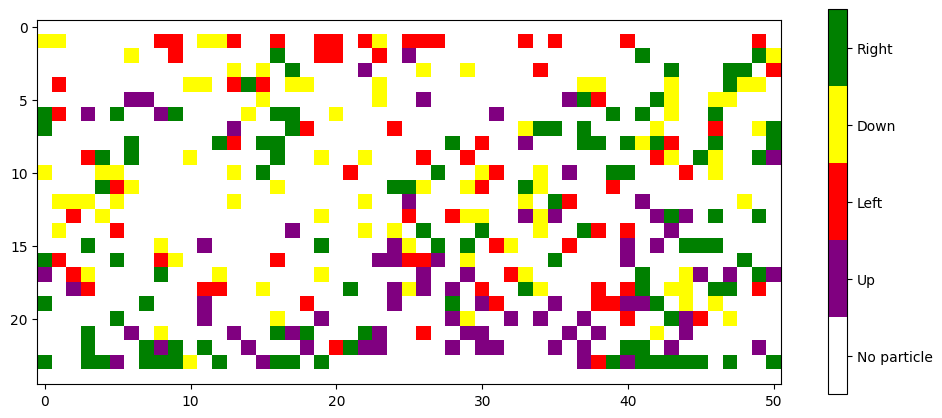

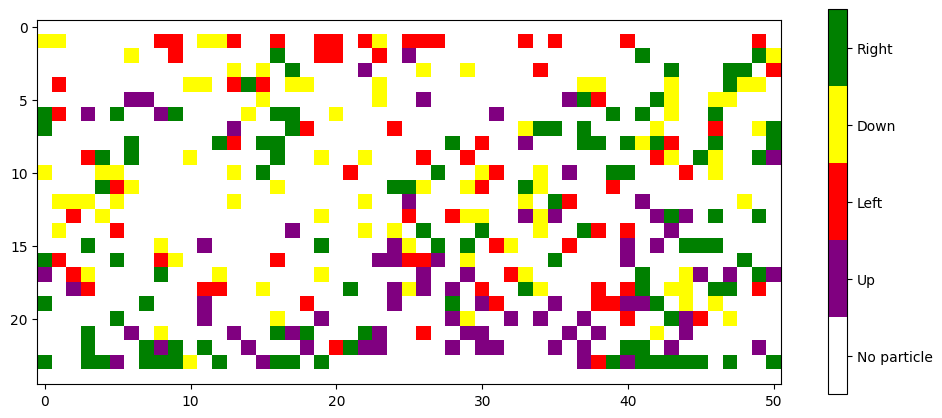

In [16]:
clmap = ListedColormap(['white', 'purple', 'red', 'yellow', 'green'])
X = data[0, :].reshape(4, ny, nx)
fig, ax = plt.subplots(figsize=(12, 5))
hi = ax.imshow(X[0, :, :] + 2 * X[1, :, :] + 3 * X[2, :, :] + 4 * X[3, :, :], cmap=clmap)
cb = plt.colorbar(hi)
ticks = [0.4, 1.2, 2, 2.8, 3.6]
ticklabels = ['No particle', 'Up', 'Left', 'Down', 'Right']  # You can customize these labels
cb.set_ticks(ticks)
cb.set_ticklabels(ticklabels)


for it in range(1, data.shape[0]):
    X = data[it, :].reshape(4, ny, nx)
    hi.set_array(X[0, :, :] + 2 * X[1, :, :] + 3 * X[2, :, :] + 4 * X[3, :, :])
    #plt.pause(0.05)
    clear_output(wait=True)
    display(fig)

## Mean Density

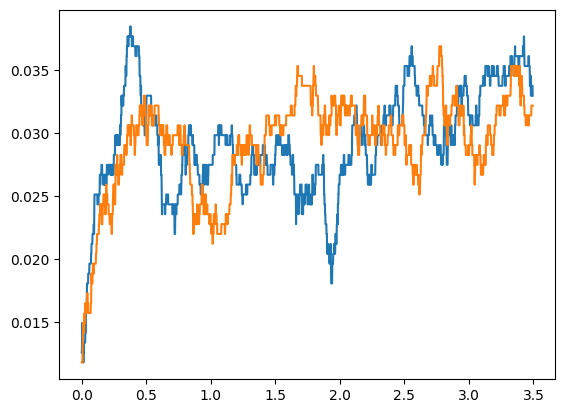

In [15]:
data = np.loadtxt(f"data_withsinks/density_y_size{ny}{nx}_seed{seed}_v0{v0}_v1{v1}_g{g}.dat")
time = data[:,1]
rho = data[:,2:]/float(nx*ny)
h = plt.plot(time,rho[:,1],time,rho[:,-2])

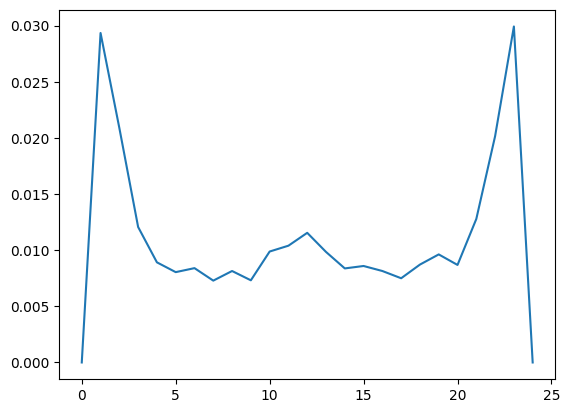

In [24]:
nt = np.argmax(time>0.5)
rho_av = np.mean(rho[nt:,:],axis=0)
plt.plot(rho_av)

In [ ]:
vx